In [90]:
import pandas as pd
import matplotlib.pyplot as plt

from sksurv.datasets import load_gbsg2
from lifelines import KaplanMeierFitter, CoxPHFitter


In [88]:
breast_cancer = load_gbsg2()
bc_df = breast_cancer[0]
bc_df.head()

,age,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize
0,70.0,66.0,no,Post,3.0,48.0,II,21.0
1,56.0,77.0,yes,Post,7.0,61.0,II,12.0
2,58.0,271.0,yes,Post,9.0,52.0,II,35.0
3,59.0,29.0,yes,Post,4.0,60.0,II,17.0
4,73.0,65.0,no,Post,1.0,26.0,II,35.0


In [115]:
#Cria um DF a partir do array de tuplas contendo tempo de vida e indicador booleano de evento (morte) ocorrido
array = breast_cancer[1]
df = pd.DataFrame(array)

#Realiza um INNER JOIN com os DF pela coluna index, que representa cada paciente

df_final = pd.merge(df, bc_df, left_index = True, right_index = True, how = "inner")

#Altera o nome das colunas
df_final.rename(columns = {'cens' : 'morte', 'time' : 'tempo', 'age' : 'idade'}, inplace = True)
df_final

,morte,tempo,idade,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize
0,True,1814.0,70.0,66.0,no,Post,3.0,48.0,II,21.0
1,True,2018.0,56.0,77.0,yes,Post,7.0,61.0,II,12.0
2,True,712.0,58.0,271.0,yes,Post,9.0,52.0,II,35.0
3,True,1807.0,59.0,29.0,yes,Post,4.0,60.0,II,17.0
4,True,772.0,73.0,65.0,no,Post,1.0,26.0,II,35.0
...,...,...,...,...,...,...,...,...,...,...
681,False,721.0,49.0,84.0,no,Pre,3.0,1.0,III,30.0
682,False,186.0,53.0,0.0,yes,Post,17.0,0.0,III,25.0
683,True,769.0,51.0,0.0,no,Pre,5.0,43.0,III,25.0
684,True,727.0,52.0,34.0,no,Post,3.0,15.0,II,23.0


In [126]:
df_final.describe()

,tempo,idade,estrec,pnodes,progrec,tsize
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,1124.489796,53.052478,96.252187,5.010204,109.995627,29.329446
std,642.791948,10.120739,153.083963,5.475483,202.331552,14.296217
min,8.000000,21.000000,0.000000,1.000000,0.000000,3.000000
25%,567.750000,46.000000,8.000000,1.000000,7.000000,20.000000
50%,1084.000000,53.000000,36.000000,3.000000,32.500000,25.000000
75%,1684.750000,61.000000,114.000000,7.000000,131.750000,35.000000
max,2659.000000,80.000000,1144.000000,51.000000,2380.000000,120.000000


In [116]:
#Objeto estimador Kaplan Meier
kmf = KaplanMeierFitter()
kmf

<lifelines.KaplanMeierFitter>

Text(0, 0.5, 'Probabilidade de Sobreviver')

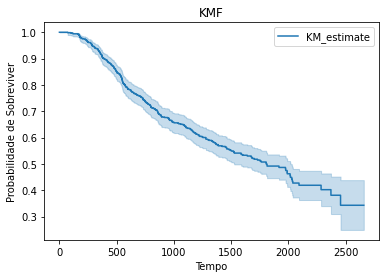

In [123]:
#Grafico estimador de sobreviencia usando KMF

kmf.fit(durations = df_final['tempo'], event_observed = df_final['morte'])
kmf.plot()
plt.title("KMF")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade de Sobreviver")

In [156]:
#Filtragem por outros parametros (idade)

df_acima_50 = df_final[df_final['idade'] > 50]
df_abaixo_50 = df_final[df_final['idade'] <= 50]

kmf_maior_50 = KaplanMeierFitter()
kmf_menor_50 = KaplanMeierFitter()


Text(0, 0.5, 'Probabilidade de Sobreviver')

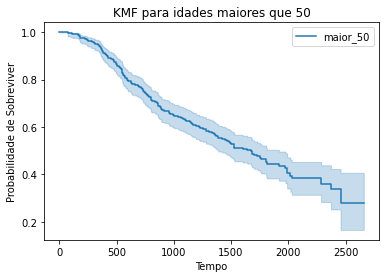

In [153]:
#Estimativa KMF para pacientes com mais de 50 anos

kmf_maior_50.fit(durations = df_acima_50['tempo'], event_observed = df_acima_50['morte'], label = "maior_50")
kmf_maior_50.plot()
plt.title("KMF para idades maiores que 50")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade de Sobreviver")

Text(0, 0.5, 'Probabilidade de Sobreviver')

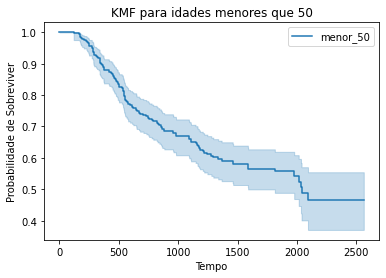

In [154]:
#Estimativa KMF para pacientes com menos de 50 anos

kmf_menor_50.fit(durations = df_abaixo_50['tempo'], event_observed = df_abaixo_50['morte'], label = "menor_50")
kmf_menor_50.plot()
plt.title("KMF para idades menores que 50")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade de Sobreviver")

Text(0.5, 1.0, 'KMF comparando idades maiores e menores ou iguais')

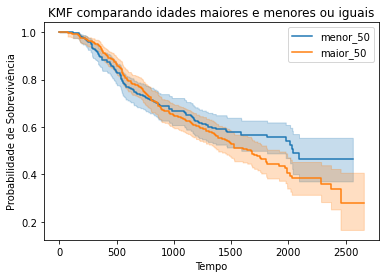

In [155]:
kmf_menor_50.plot()
kmf_maior_50.plot()
plt.xlabel("Tempo") 
plt.ylabel("Probabilidade de Sobrevivência") 
plt.title("KMF comparando idades maiores e menores ou iguais")

In [158]:
#Previsões para determinados instantes de tempo

prob_1 = kmf.predict(1000)

prob_2 = kmf.predict(2000)

print("A probabilidade de sobrevivência após 1000 dias é: ")
print(prob_1)

print("A probabilidade de sobrevivência após 2000 dias é: ")
print(prob_2)

A probabilidade de sobrevivência após 1000 dias é: 
0.6690764450542454
A probabilidade de sobrevivência após 2000 dias é: 
0.5417627232338974
